In [1]:
1 + 2

3

In [2]:
m = rand(3, 5)

3x5 Array{Float64,2}:
 0.836352   0.864608  0.867425  0.955351  0.425818
 0.0480891  0.959469  0.323172  0.591224  0.996199
 0.512984   0.101855  0.238389  0.413981  0.825376

In [3]:
m[1, 3:5]

1x3 Array{Float64,2}:
 0.867425  0.955351  0.425818

In [4]:
?Pkg.GitHub

INFO: Loading help data...


Symbol not found. Falling back on apropos search ...
No help information found.


In [5]:
Pkg.add("PyPlot")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [25]:
using PyPlot

In [7]:
get_cmap("RdGy")

In [9]:
function julia(z, c; maxiter=200)
    for n = 1:maxiter
        if abs2(z) > 4
            return n-1
        end
        z = z*z + c
    end
    return maxiter
end

julia (generic function with 1 method)

In [10]:
?uint8

Base.uint8(x)

   Convert a number or array to "Uint8" data type


In [11]:
uint8(2)

0x02

In [12]:
a = complex(1, 2)
b = complex(3, 4)

3 + 4im

In [13]:
a * b

-5 + 10im

In [22]:
m = [uint8(julia(complex(r, i), complex(-.06, .67))) for i = 1:-0.002:-1, r= 1:-0.002:-1]

1001x1001 Array{Uint8,2}:
 0x01  0x01  0x01  0x01  0x01  0x01  …  0x03  0x03  0x03  0x03  0x03  0x02
 0x01  0x01  0x01  0x01  0x01  0x01     0x03  0x03  0x03  0x03  0x03  0x03
 0x01  0x01  0x01  0x01  0x01  0x01     0x03  0x03  0x03  0x03  0x03  0x03
 0x01  0x01  0x01  0x01  0x01  0x01     0x03  0x03  0x03  0x03  0x03  0x03
 0x01  0x01  0x01  0x01  0x01  0x01     0x03  0x03  0x03  0x03  0x03  0x03
 0x01  0x01  0x01  0x01  0x01  0x01  …  0x03  0x03  0x03  0x03  0x03  0x03
 0x01  0x01  0x01  0x01  0x01  0x01     0x03  0x03  0x03  0x03  0x03  0x03
 0x01  0x01  0x01  0x01  0x01  0x01     0x03  0x03  0x03  0x03  0x03  0x03
 0x01  0x01  0x01  0x01  0x01  0x01     0x03  0x03  0x03  0x03  0x03  0x03
 0x01  0x01  0x01  0x01  0x01  0x01     0x03  0x03  0x03  0x03  0x03  0x03
 0x01  0x01  0x01  0x01  0x01  0x01  …  0x03  0x03  0x03  0x03  0x03  0x03
 0x01  0x01  0x01  0x01  0x01  0x01     0x03  0x03  0x03  0x03  0x03  0x03
 0x01  0x01  0x01  0x01  0x01  0x01     0x03  0x03  0x03  0x03  0x03  0x03

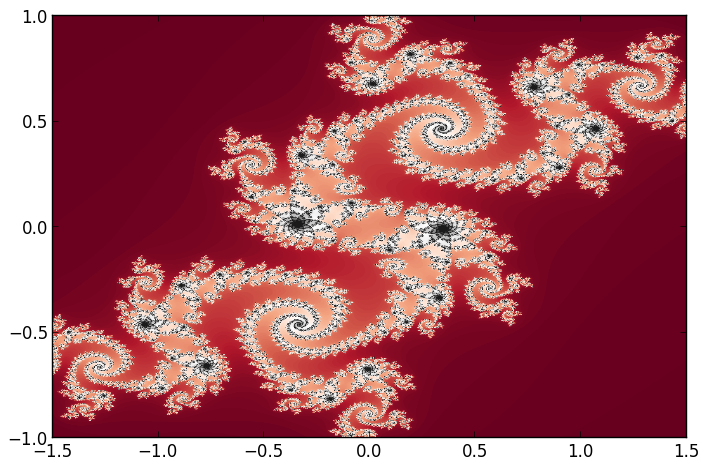

PyObject <matplotlib.image.AxesImage object at 0x11441e890>

In [17]:
imshow(m, cmap="RdGy", extent=[-1.5, 1.5, -1, 1])

In [18]:
Pkg.add("Compose")

INFO: Cloning cache of Compose from git://github.com/dcjones/Compose.jl.git
INFO: Cloning cache of DataStructures from git://github.com/JuliaLang/DataStructures.jl.git
INFO: Cloning cache of Iterators from git://github.com/JuliaLang/Iterators.jl.git
INFO: Installing Compose v0.3.11
INFO: Installing DataStructures v0.3.5
INFO: Installing Iterators v0.1.7
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of Compose
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [27]:
using Compose

function sierpinski(n)
    if n == 0
        compose(context(), polygon([(1,1), (0,1), (1/2, 0)]))
    else
        t = sierpinski(n - 1)
        compose(context(),
                (context(1/4,   0, 1/2, 1/2), t),
                (context(  0, 1/2, 1/2, 1/2), t),
                (context(1/2, 1/2, 1/2, 1/2), t))
    end
end


img = SVG("sierpinski.svg", 4inch, 4(sqrt(3)/2)inch)
draw(img, compose(sierpinski(8), linewidth(0.1mm), fill(nothing), stroke("black")))

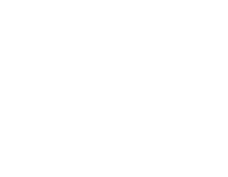

In [31]:
draw(SVG(9inch,7inch), compose(sierpinski(8), fill(nothing), linewidth(0.1mm)))